Text(0.5, 1.0, 'DCV Graph')

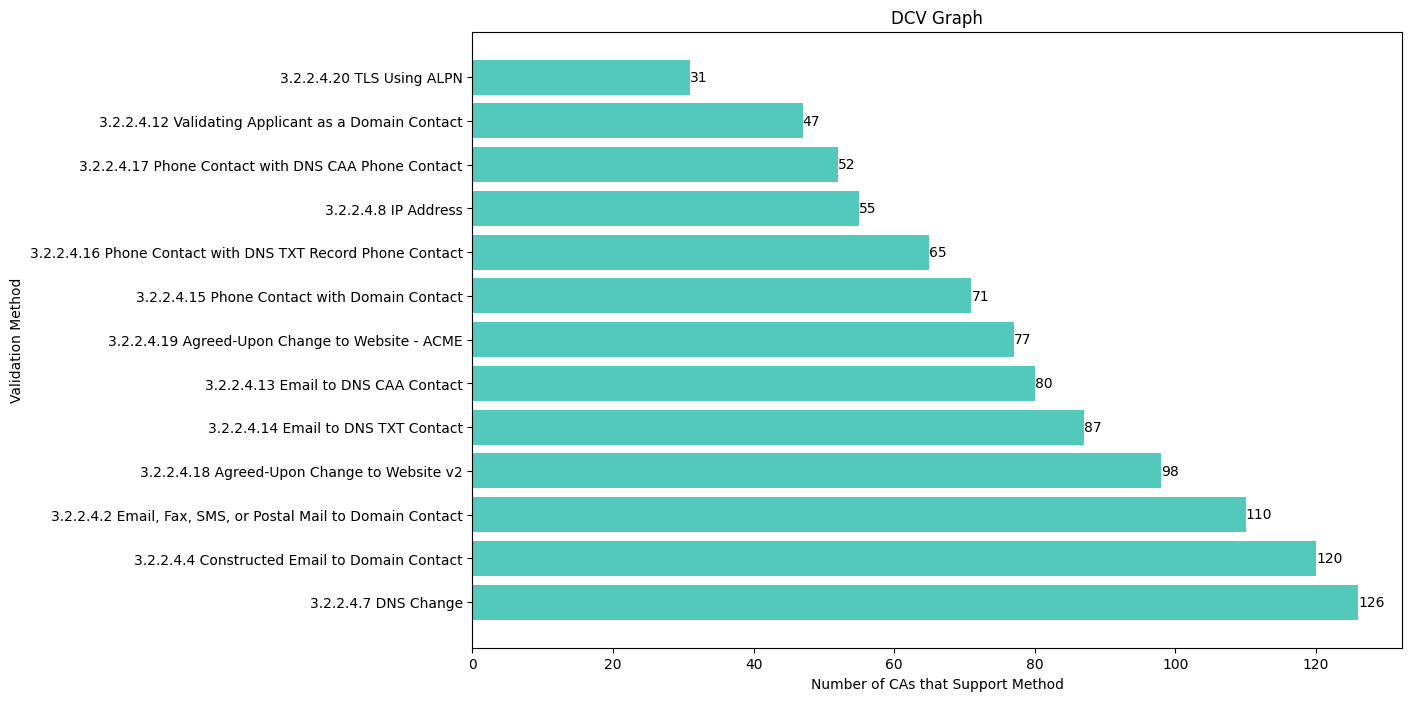

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googledb.csv')
df_expanded = df.set_index(['Parent CA Owner/Certificate', 'CA Owner/Certificate Name'])['TLS Certificate Domain Validation Method'].str.split(';', expand=True).stack().reset_index(name='Validation Method')
df_expanded['Validation Method'] = df_expanded['Validation Method'].str.strip()
counts = df_expanded['Validation Method'].value_counts().reset_index()
counts.columns = ['Validation Method', 'Number of CAs']
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(counts['Validation Method'], counts['Number of CAs'], color='#53c9bc')

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='left', fontsize=10, color='black')

ax.set_xlabel('Number of CAs that Support Method')
ax.set_ylabel('Validation Method')
ax.set_title('DCV Graph')

Text(0.5, 1.0, 'DCV Graph Grouped by Parent CA')

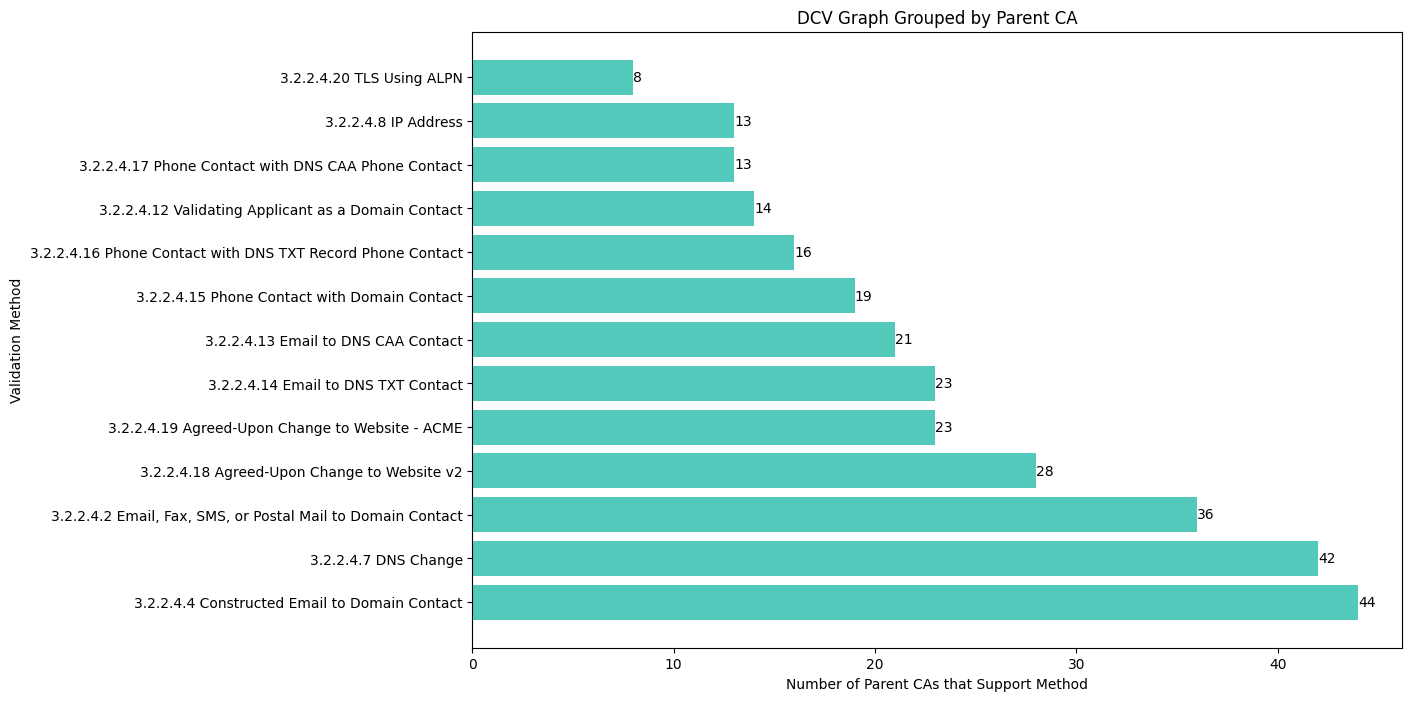

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googledb.csv')
grouped = df.groupby('Parent CA Owner/Certificate')['TLS Certificate Domain Validation Method'].agg(lambda x: ';'.join(set(';'.join(x).split(';'))))
df_expanded = grouped.str.split(';', expand=True).stack().reset_index(name='Validation Method')
df_expanded['Validation Method'] = df_expanded['Validation Method'].str.strip()
counts = df_expanded['Validation Method'].value_counts().reset_index()
counts.columns = ['Validation Method', 'Number of CAs']
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(counts['Validation Method'], counts['Number of CAs'], color='#53c9bc')

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='left', fontsize=10, color='black')

ax.set_xlabel('Number of Parent CAs that Support Method')
ax.set_ylabel('Validation Method')
ax.set_title('DCV Graph Grouped by Parent CA')